<a href="https://colab.research.google.com/github/deivisongithub/Aprendizado-de-Maquina/blob/main/Miniprojeto_ML_analytics_Deivison_Jansen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto 1 - Aprendizagem de Máquina

###Grupo: 
**Nome:** Deivison Rodrigues Jordão **Matricula:** 20200023728

**Nome:** Jansen Cruz de Souza **Matricula:** 20200139170

### **Mini-Projeto: Reconhecimento de Dígitos** </font>

 **Descrição:** Neste notebook aplicamos os três modelos lineares de Aprendizagem de Máquina (AM): Perceptron, Regressão Linear e Regressão Logística, nos datasets produzidos (train_redu.csv e test_redu.csv) contendo os cálculos de simetria e intensidade.

# Classificação dos dígitos 1 x 5

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from numpy import linalg as LA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

## Separando os dados de treino e teste (Train and Test)

Devemos criar uma pasta chamada data e colocar os arquivos do tipo csv desejados.

In [ ]:
train = pd.read_csv("data/train_redu_v.csv",sep=",")
test = pd.read_csv("data/test_redu_v.csv",sep=",")

#train = train.drop(columns="Unnamed: 0")
#test = test.drop(columns="Unnamed: 0")

train1x5 = train.query("label == 1 or label == 5")
test1x5 = test.query("label == 1 or label == 5")


## Plotando o gráfico por intensidade e simetria dos dígitos 1 x 5

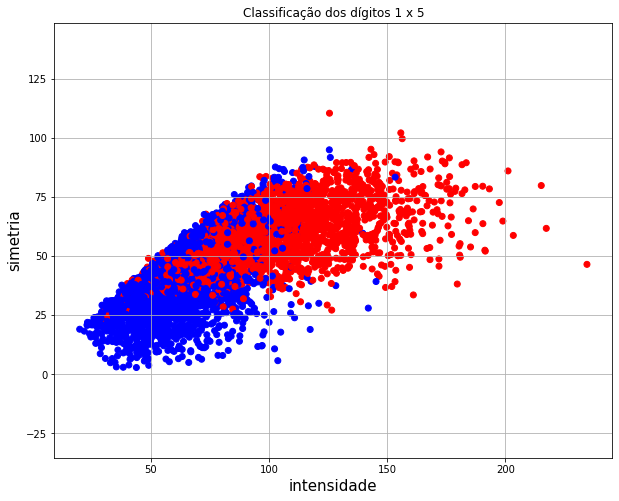

In [ ]:
#Atribuindo a lista Y os valores 1 para quando o label for 1 (azul) e -1 para quando o label foi 5 (vermelho)
Y = []
c_cor = []
for i in range(len(train1x5)):
  if train1x5.label.values[i] == 1:
      Y.append(1)
      c_cor.append('blue')
  else:
      Y.append(-1)
      c_cor.append('red')

plt.figure(figsize=(10, 8))
plt.title('Classificação dos dígitos 1 x 5')
plt.xlabel('intensidade', fontsize=15)
plt.ylabel('simetria', fontsize=15)
plt.scatter(train1x5.intensity.values,train1x5.symmetry.values, c=c_cor)
plt.axis('equal')
plt.grid(True)
plt.show()

## PLA (Perceptron Learning Algorithm)
### Definindo classificação através do perceptron 2D

In [ ]:
#Função ativação ou sinal
def ativacao(x):
    if x < 0:
        return -1
    else:
        return 1

In [ ]:
#Controi nova lista
def constroiLista(X,Y,y):
    new_lista = []
    new_ind = []
    for i in range(len(X)):
        if Y[i] != y[i]:
            new_lista.append(X[i])
            new_ind.append(i)
    return new_lista, new_ind

In [ ]:
#Algoritmo do perceptron
def PLA(pontosX,pontosY,Y):
      N = 500
      X = np.array([np.ones(len(pontosX)), pontosX, pontosY])
      w = [0,0,0]
      lista = np.copy(X)
      ind = np.random.randint(len(lista[1]))
      best_errors = np.copy(lista[1])
      best_w = np.copy(w)
      while(len(lista[1]) > 0 and N):
          w = w + (X.T[ind]*Y[ind])
          y_pred = np.array([ativacao(np.dot(X.T[i],w)) for i in range(len(X.T))])
          lista, ind_list = constroiLista(X.T, Y, y_pred)       
          if len(lista) < len(best_errors):
            best_w = w
            best_errors = lista
          if len(lista) == 0:
              break
          ind = ind_list[0]
          N -= 1
      return best_w

In [ ]:
#Executando o PLA e retornando os pesos dos dados treinados
w = PLA(train1x5.intensity.values,train1x5.symmetry.values,Y)

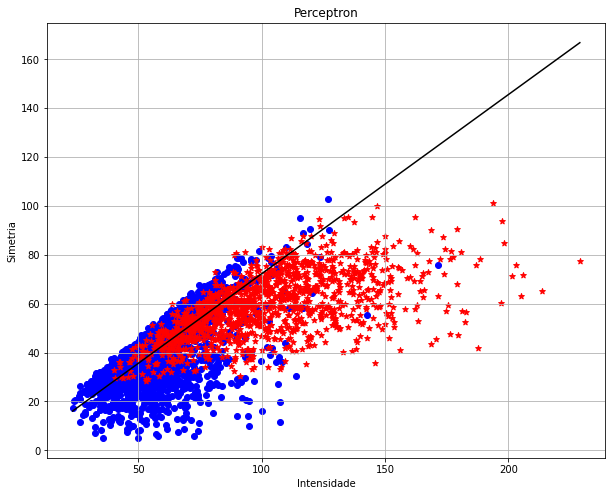

In [ ]:
#Atribuindo a variável y_pred os valores preditos da base de testes com base no melhor peso encontrado pelo PLA
y_pred = []
X_test = np.array([np.ones(len(test1x5.intensity.values)), test1x5.intensity.values, test1x5.symmetry.values])
for i in range(len(test1x5)):
  if np.dot(X_test.T[i],w) > -1:
      y_pred.append(1)
  else:
      y_pred.append(5)


X_test_1 = test1x5.query("label == 1")
X_test_5 = test1x5.query("label == 5")

# Vizualização do plot
plt.figure(figsize=(10, 8))
plt.title('Perceptron')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.scatter(X_test_1.intensity.values,X_test_1.symmetry.values, c='blue',marker='o') # 1
plt.scatter(X_test_5.intensity.values,X_test_5.symmetry.values, c='red', marker='*') # 5
plt.plot([min(test1x5.intensity.values), max(test1x5.intensity.values)], [(-w[1]/w[2])*x + (-w[0]/w[2]) for x in [min(test1x5.intensity.values), max(test1x5.intensity.values)]], '-k')
plt.grid(True)
plt.show()



Relatório de Eficácia: 

              precision    recall  f1-score   support

           1       0.73      0.46      0.56      1528
           5       0.56      0.80      0.66      1324

    accuracy                           0.62      2852
   macro avg       0.65      0.63      0.61      2852
weighted avg       0.65      0.62      0.61      2852


Matriz de Confusão: 



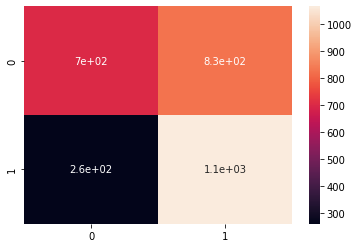

In [ ]:
#Relatórios de Eficácia do modelo

print(f"\nRelatório de Eficácia: \n")
print(classification_report(test1x5.label.values, y_pred))


print(f"\nMatriz de Confusão: \n")
sns.heatmap(confusion_matrix(test1x5.label.values, y_pred), annot=True)

## Regressão Linear

In [ ]:
class Linear_Regression:
    def fit(self, _X, _y):
      #Adicionando uma coluna composta de 1, para que atue como x0 (bias)
      _Xtemp = np.vstack([[1, t] for t in _X])
      _X = _Xtemp

      self.w = np.linalg.inv(_X.T.dot(_X)).dot(_X.T).dot(_y) #computando pesos w usando pseudo-inversa
      
    def predict(self, _x,_y):
      y_pred = []
      for i in range(len(_x)):
        if (self.w[1] * _x[i] + self.w[0] > _y[i]): #classificando atraves da reta rezuando dos pesos w
          y_pred.append(1)
        else:
          y_pred.append(5)
      return y_pred #retorna vetor com as classificacao preditas
         
    def getW(self):
      return self.w #retorna os pesos

    #funcao para visualizacao dos pontos e da reta gera pelos pesos da regressao(h(x))
    def visualization_lr(self,X_test,X_test_pred):

      #Plotando crassificação pela regressão linear

      X_test_1_pred = X_test_pred.query("label == 1")
      X_test_5_pred = X_test_pred.query("label == 5")

      plt.figure(figsize=(10, 8))
      plt.title('Regressão Linear')
      plt.xlabel('Intensidade')
      plt.ylabel('Simetria')
      plt.scatter(X_test_1_pred['intensity'],X_test_1_pred['symmetry'], c='blue',marker='*') # 1
      plt.scatter(X_test_5_pred['intensity'],X_test_5_pred['symmetry'], c='red', marker='.') # 5
      plt.plot([min(X_test['intensity']), max(X_test['intensity'])], [(self.w[1] * x + self.w[0]) for x in [min(X_test['intensity']), max(X_test['intensity'])]], '-k', label='g(.)')

      plt.show()

In [ ]:
test1x5_lr_intensity = [i for i in test1x5['intensity']]
test1x5_lr_symmetry = [i for i in test1x5['symmetry']]

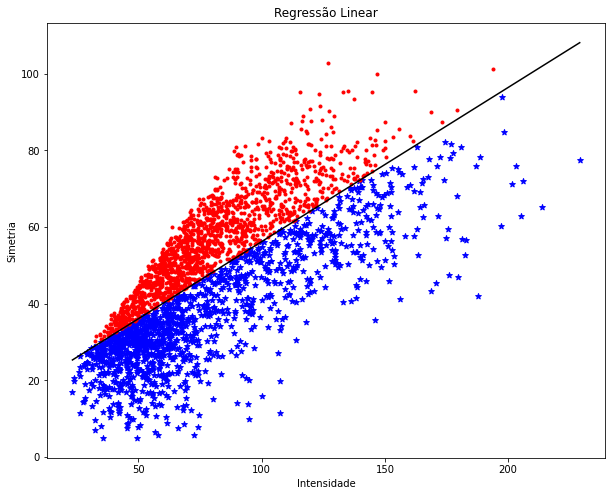

In [ ]:
lr = Linear_Regression() #cria objeto linear regression
lr.fit(train1x5['intensity'],train1x5['symmetry']) #treina computa os pesos w
y_pred = lr.predict(test1x5_lr_intensity,test1x5_lr_symmetry) # Faz a predicao da classificacao para um novo grupo de pontos(teste)
#print(" W: ",lr.getW()) # imprime os pesos w

test1x5_lr_predict = test1x5.drop(columns='label')
test1x5_lr_predict['label'] = y_pred

lr.visualization_lr(test1x5,test1x5_lr_predict) # expoe graficamente



Relatório de Eficácia: 

              precision    recall  f1-score   support

           1       0.63      0.54      0.58      1528
           5       0.55      0.64      0.59      1324

    accuracy                           0.59      2852
   macro avg       0.59      0.59      0.59      2852
weighted avg       0.59      0.59      0.59      2852


Matriz de Confusão: 



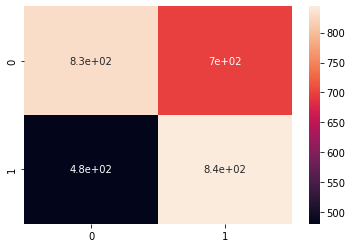

In [ ]:
# Relatório de eficácia
print(f"\nRelatório de Eficácia: \n")
print(classification_report(test1x5['label'], y_pred))

# Matriz de confusão
print(f"\nMatriz de Confusão: \n")
sns.heatmap(confusion_matrix(test1x5['label'], y_pred), annot=True)

## Regressão Logística

In [ ]:
class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=100, bs=1000000):
      self.eta = eta
      self.tmax = tmax
      self.batch_size = bs

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        X = np.array(_X)
        y = np.array(_y)

        N = X.shape[0]
        d = X.shape[1]
        w = np.zeros(d, dtype=float)
        self.w = []
        
        for i in tqdm(range(self.tmax)):
            vsoma = np.zeros(d, dtype=float)

            #Escolhendo o lote de entradas
            if self.batch_size < N:
                indices = random.sample(range(N),self.batch_size)
                batchX = [X[index] for index in indices]
                batchY = [y[index] for index in indices]
            else:
                batchX = X
                batchY = y

            #computando o gradiente no ponto atual
            for xn, yn in zip(batchX, batchY):
                vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))
            
            gt = vsoma/self.batch_size
            #Condicao de parada: se ||deltaF|| < epsilon (0.0001)
            if LA.norm(gt) < 0.0001 :
                break
            w = w + (self.eta*gt)

        self.w = w
    
        
    #funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
      return [(1 / (1 + np.exp(-(np.dot(self.w.T, x))))) for x in X]

    #Predicao por classificação linear
    def predict(self, X):
      return [1 if (1 / (1 + np.exp(-(self.w.T @ x)))) >= 0.5
              else -1 for x in X]
    
    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [ ]:
#Preparando os dados de treino
train1x5_x1_lr_1 = [1 for i in range(len(train1x5['intensity']))]
train1x5_x1_lr_intensity = [i for i in train1x5['intensity']]
train1x5_x2_lr_symmetry = [i for i in train1x5['symmetry']]

_X_train_aux_1 = [1 for i in range(len(test1x5['intensity']))]
_X = list(zip(_X_train_aux_1,train1x5_x1_lr_intensity,train1x5_x2_lr_symmetry ))

rx = list(zip(train1x5_x1_lr_1,train1x5_x1_lr_intensity,train1x5_x2_lr_symmetry))
_y = [1 if y > 1 else -1 for y in train1x5['label']]

#Preparando os dados de Teste
_X_test_aux_1 = [1 for i in range(len(test1x5['intensity']))]
_X_test = list(zip(_X_test_aux_1,test1x5['intensity'],test1x5['symmetry']))
_X_test_s1 = list(zip(test1x5['intensity'],test1x5['symmetry']))
_y_test = [1 if y > 1 else -1 for y in test1x5['label']]

In [ ]:
#Executar o ajuste dos dados com Regressao Logistica
classifier = LogisticRegression_()
classifier.fit(rx,_y)

100%|██████████| 100/100 [00:13<00:00,  7.36it/s]


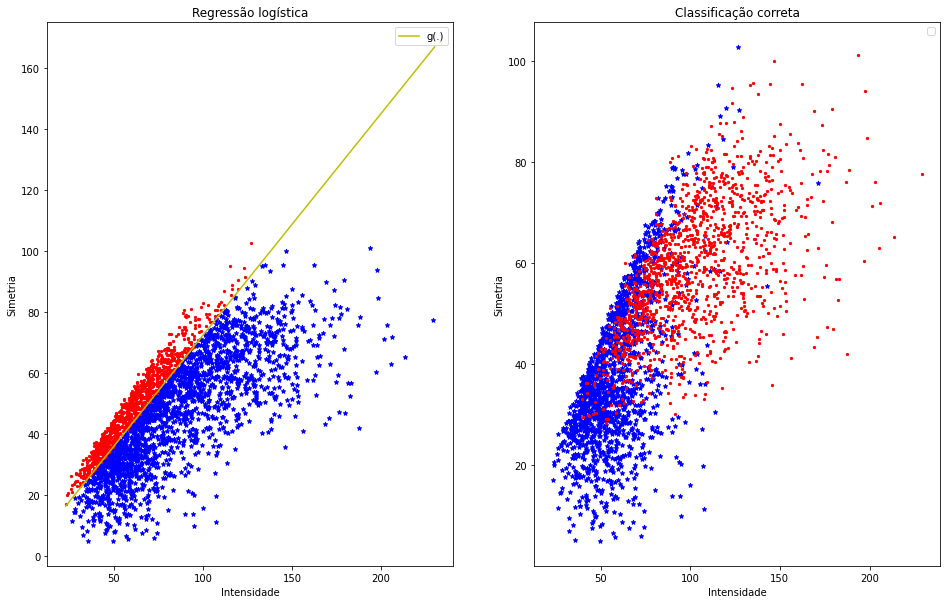

In [ ]:
#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_prob(_X_test)

#for x, pred_x in zip(_X_test, pred) :
#  plt.annotate("{:.2f}".format(pred_x), xy=(x[0], x[1]), xytext=(5,-5), textcoords='offset points')

#desenha a reta inferida pela regressao logistica

xRL = [int(min(_X_test)[1]), int(max(_X_test)[1])+1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]

fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 10))

ax1.set_title('Regressão logística')
ax1.set_xlabel('Intensidade')
ax1.set_ylabel('Simetria')
ax1.plot(xRL, yRL, 'y-', label='g(.)')
ax1.legend(loc='upper right')

ax2.set_title('Classificação correta')
ax2.set_xlabel('Intensidade')
ax2.set_ylabel('Simetria')
ax2.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
N = len(_X_test_s1)

xP = [_X_test_s1[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [_X_test_s1[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [_X_test_s1[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [_X_test_s1[i][1] for i in range(N) if(pred[i] < 0.5)]

ax1.scatter(xP, yP, color='blue', marker='*', s=20)
ax1.scatter(xN, yN, color='red', marker='.', s=20)

#plota os pontos classificados corretamente

X_test_1 = test1x5.query("label == 1")
X_test_5 = test1x5.query("label == 5")

plt.scatter(X_test_1['intensity'],X_test_1['symmetry'], c='blue',marker='*',s=20) # 1
plt.scatter(X_test_5['intensity'],X_test_5['symmetry'], c='red', marker='.',s=20) # 5

plt.show()

#Computando o erro dentro e fora da amostra (Ein e Eout)
pred_classifier_test = classifier.predict(_X_test)
pred_classifier_train = classifier.predict(_X)



Relatório de Eficácia: 

              precision    recall  f1-score   support

          -1       0.45      0.73      0.55       927
           1       0.81      0.56      0.66      1925

    accuracy                           0.62      2852
   macro avg       0.63      0.65      0.61      2852
weighted avg       0.69      0.62      0.63      2852


Matriz de Confusão: 



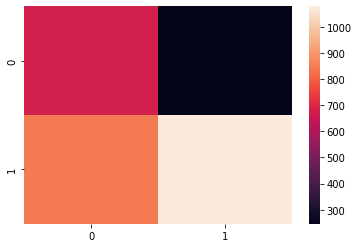

In [ ]:
# Relatório de eficácia
print(f"\nRelatório de Eficácia: \n")
print(classification_report(pred_classifier_test, _y_test))

# Matriz de confusão
print(f"\nMatriz de Confusão: \n")
sns.heatmap(confusion_matrix(pred_classifier_test, _y_test))